In [1]:
import numpy as np
import pandas as pd
from math import log10, e, pi, sqrt, exp, log
from scipy.stats import norm,lognorm, expon
from scipy.stats import probplot,kstest,linregress
import matplotlib.pyplot as plt

Os nomes das colunas da planilha foram alterados a fim de facilitar o desenvolvimento.
Nesse primeiro momento, os dados são extraídos do arquivo csv, usando a biblioteca Pandas.
Depois são transformados em numpy arrays. 

In [2]:
data = pd.read_csv('Dados-medicos.csv', 
                      skiprows = 1, 
                      sep='\s+',
                       names=['idade','peso','carga','vo2'])

data = np.array(data)

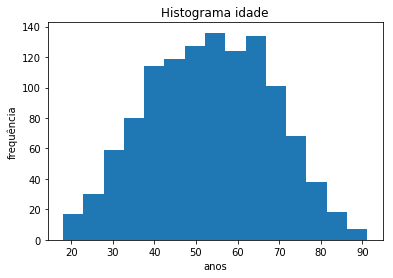

In [3]:
idade = data[:,0]
sigma = np.std(idade)
m = 1 + 3.3*log10(idade.size)
b = 3.49*sigma*pow(idade.size,-1./3)

#bins_list = [x for x in np.arange(np.amin(idade),np.amin(idade)+(b*m),b)]
bins_list = [x for x in np.arange(np.amin(idade),np.amax(idade)+b,b)]
plt.hist(idade,bins = bins_list)
plt.xlabel('anos')
plt.ylabel('frequência')
plt.title('Histograma idade')
#plt.savefig('idade-hist.png',figsize=(20,15),dpi=200)


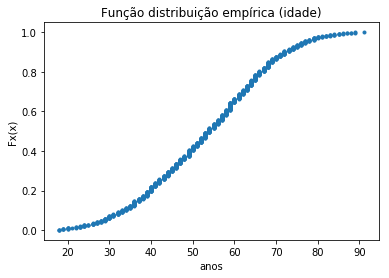

In [4]:
y = np.arange(1, len(idade)+1) / len(idade)
plt.plot(np.sort(idade),y,marker='.',linestyle='none')
plt.xlabel('anos')
plt.ylabel('Fx(x)')
plt.title('Função distribuição empírica (idade)')
#plt.savefig('idade-dist.png',figsize=(20,15),dpi=150)


Text(0.5,1,'Histograma peso')

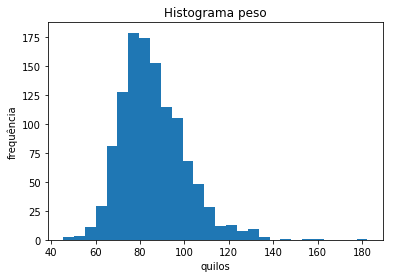

In [5]:
peso = data[:,1]
sigma = np.std(peso)
m = 1 + 3.3*log10(peso.size)
b = 3.49*sigma*pow(peso.size,-1./3)

#bins_list = [x for x in np.arange(np.amin(idade),np.amin(idade)+(b*m),b)]
bins_list = [x for x in np.arange(np.amin(peso),np.amax(peso)+b,b)]
plt.hist(peso,bins = bins_list)
plt.xlabel('quilos')
plt.ylabel('frequência')
plt.title('Histograma peso')
#plt.savefig('peso-hist.png',figsize=(20,15),dpi=200)

Text(0.5,1,'Função distribuição empírica (peso)')

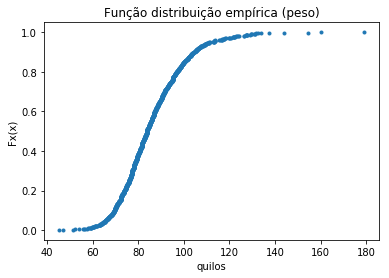

In [6]:
y = np.arange(1, len(peso)+1) / len(peso)
plt.plot(np.sort(peso),y,marker='.',linestyle='none')
plt.xlabel('quilos')
plt.ylabel('Fx(x)')
plt.title('Função distribuição empírica (peso)')
#plt.savefig('peso-dist.png',figsize=(20,15),dpi=150)

Text(0.5,1,'Histograma carga')

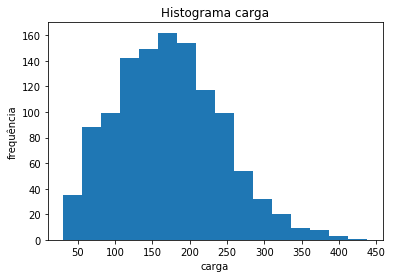

In [7]:
carga = data[:,2]
sigma = np.std(carga)
m = 1 + 3.3*log10(carga.size)
b = 3.49*sigma*pow(carga.size,-1./3)*1.1

#bins_list = [x for x in np.arange(np.amin(idade),np.amin(idade)+(b*m),b)]
bins_list = [x for x in np.arange(np.amin(carga),np.amax(carga)+b,b)]
plt.hist(carga,bins = bins_list)
plt.xlabel('carga')
plt.ylabel('frequência')
plt.title('Histograma carga')
#plt.savefig('carga-hist.png',figsize=(20,15),dpi=200)

Text(0.5,1,'Função distribuição empírica (carga)')

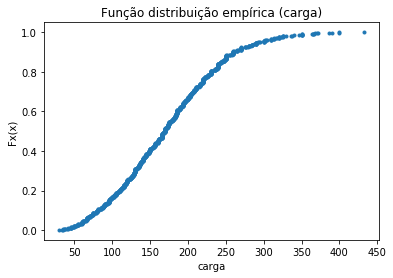

In [8]:
y = np.arange(1, len(carga)+1) / len(carga)
plt.plot(np.sort(carga),y,marker='.',linestyle='none')
plt.xlabel('carga')
plt.ylabel('Fx(x)')
plt.title('Função distribuição empírica (carga)')
#plt.savefig('carga-dist.png',figsize=(20,15),dpi=150)

Text(0.5,1,'Histograma vo2')

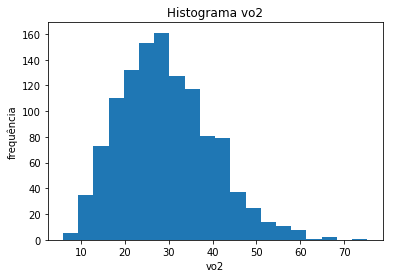

In [9]:
vo2 = data[:,3]
sigma = np.std(vo2)
m = 1 + 3.3*log10(vo2.size)
b = 3.49*sigma*pow(vo2.size,-1./3)

#bins_list = [x for x in np.arange(np.amin(idade),np.amin(idade)+(b*m),b)]
bins_list = [x for x in np.arange(np.amin(vo2),np.amax(vo2)+b,b)]
plt.hist(vo2,bins = bins_list)
plt.xlabel('vo2')
plt.ylabel('frequência')
plt.title('Histograma vo2')
#plt.savefig('vo2-hist.png',figsize=(20,15),dpi=200)

Text(0.5,1,'Função distribuição empírica (vo2)')

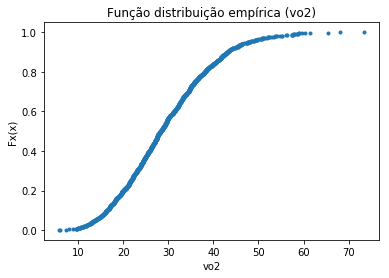

In [10]:
y = np.arange(1, len(vo2)+1) / len(vo2)
plt.plot(np.sort(vo2),y,marker='.',linestyle='none')
plt.xlabel('vo2')
plt.ylabel('Fx(x)')
plt.title('Função distribuição empírica (vo2)')
#plt.savefig('vo2-dist.png',figsize=(20,15),dpi=150)

In [11]:
print('idade média:',np.mean(idade))
print('peso médio:',np.mean(peso))
print('carga média:',np.mean(carga))
print('vo2 médio:',np.mean(vo2))

idade média: 53.29095563139932
peso médio: 85.92577645051195
carga média: 172.27150170648466
vo2 médio: 29.39472792315316


In [12]:
print('idade variância:',np.var(idade))
print('peso variância:',np.var(peso))
print('carga variância:',np.var(carga))
print('vo2 variância:',np.var(vo2))

idade variância: 217.26773389905532
peso variância: 218.82688514797786
carga variância: 4908.8539660042625
vo2 variância: 110.0982346293626


Text(0,0.5,'anos')

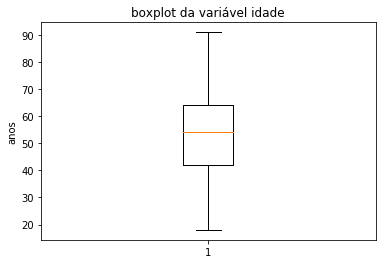

In [13]:
plt.boxplot(idade)
plt.title('boxplot da variável idade')
plt.ylabel('anos')
#plt.savefig('idade-boxplot.png')

Text(0,0.5,'Kg')

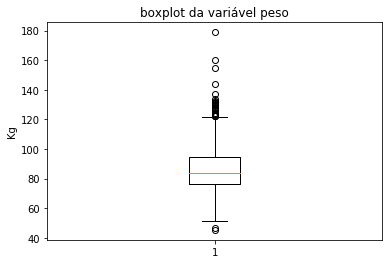

In [14]:
plt.boxplot(peso)
plt.title('boxplot da variável peso')
plt.ylabel('Kg')
#plt.savefig('peso-boxplot.png')

Text(0.5,1,'Boxplot da variável carga')

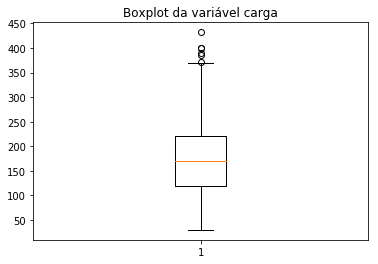

In [15]:
plt.boxplot(carga)
plt.title('Boxplot da variável carga')
#plt.savefig('carga-boxplot.png')

Text(0.5,1,'Boxplot da variável vo2')

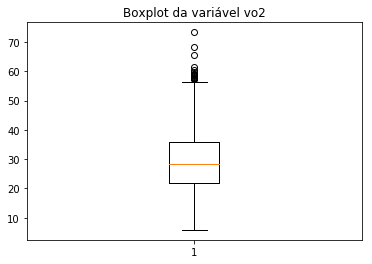

In [16]:
plt.boxplot(vo2)
plt.title('Boxplot da variável vo2')
#plt.savefig('vo2-boxplot.png')

Agora precisamos obter a parametrização das distribuições citadas no projeto para todas as variáveis no cojunto de dados: idade, peso, carga final e vo2. Será utilizado o método da máxima verossimilhança para estimar os parâmetros das distribuições: exponencial, gaussiana, lognormal e weibull

Agora iremos definir os MLE's para cada uma das variáveis do conjunto. A dedução das fórmulas usadas estão no relatório.

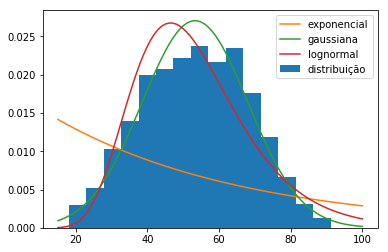

In [17]:
l_exp = idade.size / np.sum(idade)

#media e variância da distribuição normal
media = np.mean(idade)
var = np.var(idade)

#media e variância da distribuição lognormal 
media_log = np.mean(list(map(log,idade)))
var_log = np.var(list(map(log,idade)))
std_log = np.std(list(map(log,idade)))

#lambda da distribuição weibull

exp = lambda x: l_exp * (e**(-l_exp * x))
gaussian = lambda x : 1/(var * sqrt(2 * pi)) * e**( - ((x - media)**2) / (2 * var**2) )
lognormal= lambda x : (e**(-(log(x) - media_log)**2 / (2 * var_log**2))/ (x * var_log * sqrt(2 * pi)))

#domínio do gráfico para as distribuições parametrizadas
x = [x for x in range(15,int(round(np.amax(idade)))+10)]
sigma = np.std(idade)
b = 3.49*sigma*pow(idade.size,-1./3)
bins_list = [y for y in np.arange(np.amin(idade),np.amax(idade)+b,b)]

exp_idade = list(map(expon(scale= 1. / (l_exp)).pdf,x))
gaussian_idade = list(map(norm(loc=media,scale=np.std(idade)).pdf,x))
lognormal_idade = list(map(lognorm(s=std_log,scale=e**(media_log)).pdf,x))

idade_exp_ks = kstest(idade,expon(scale=1. / (l_exp)).cdf)[0]
idade_norm_ks = kstest(idade,norm(loc=media,scale=np.std(idade)).cdf)[0]
idade_lognorm_ks = kstest(idade,lognorm(s=std_log,scale=e**(media_log)).cdf)[0]

plt.hist(idade,bins = bins_list, label='distribuição', density=True)
plt.plot(x,exp_idade,label='exponencial')
plt.plot(x,gaussian_idade,label='gaussiana')
plt.plot(x,lognormal_idade,label='lognormal')
plt.legend(loc='best')
#plt.savefig('mle-idade.png')

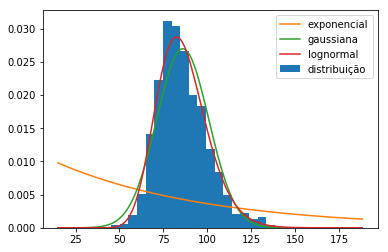

In [18]:
l_exp = peso.size / np.sum(peso)

#media e variância da distribuição normal
media = np.mean(peso)
var = np.var(peso)

#media e variância da distribuição lognormal 
media_log = np.mean(list(map(log,peso)))
var_log = np.var(list(map(log,peso)))
std_log = np.std(list(map(log,peso)))

#lambda da distribuição weibull

exp = lambda x: l_exp * (e**(-l_exp * x))
gaussian = lambda x : 1/(var * sqrt(2 * pi)) * e**( - ((x - media)**2) / (2 * var**2) )
lognormal= lambda x : (e**(-(log(x) - media_log)**2 / (2 * var_log**2))/ (x * var_log * sqrt(2 * pi)))

#domínio do gráfico para as distribuições parametrizadas
x = [x for x in range(15,int(round(np.amax(peso)))+10)]
sigma = np.std(peso)
b = 3.49*sigma*pow(peso.size,-1./3)
bins_list = [y for y in np.arange(np.amin(peso),np.amax(peso)+b,b)]

exp_peso = list(map(expon(scale= 1. / (l_exp)).pdf,x))
gaussian_peso = list(map(norm(loc=media,scale=np.std(peso)).pdf,x))
lognormal_peso = list(map(lognorm(s=std_log,scale=e**(media_log)).pdf,x))

peso_exp_ks = kstest(peso,expon(scale=1. / (l_exp)).cdf)[0]
peso_norm_ks = kstest(peso,norm(loc=media,scale=np.std(peso)).cdf)[0]
peso_lognorm_ks = kstest(peso,lognorm(s=std_log,scale=e**(media_log)).cdf)[0]

plt.hist(peso,bins = bins_list, label='distribuição', density=True)
plt.plot(x,exp_peso,label='exponencial')
plt.plot(x,gaussian_peso,label='gaussiana')
plt.plot(x,lognormal_peso,label='lognormal')
plt.legend(loc='best')
#plt.savefig('mle-peso.png')

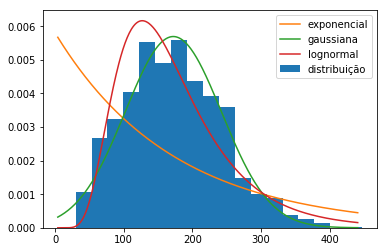

In [19]:
l_exp = carga.size / np.sum(carga)

#media e variância da distribuição normal
media = np.mean(carga)
var = np.var(carga)

#media e variância da distribuição lognormal 
media_log = np.mean(list(map(log,carga)))
var_log = np.var(list(map(log,carga)))
std_log = np.std(list(map(log,carga)))
#lambda da distribuição weibull

exp = lambda x: l_exp * (e**(-l_exp * x))
gaussian = lambda x : 1/(var * sqrt(2 * pi)) * e**( - ((x - media)**2) / (2 * var**2) )
lognormal= lambda x : (e**(-(log(x) - media_log)**2 / (2 * var_log**2))/ (x * var_log * sqrt(2 * pi)))

#domínio do gráfico para as distribuições parametrizadas
x = [x for x in range(4,int(round(np.amax(carga)))+10)]
sigma = np.std(carga)
b = 3.49*sigma*pow(carga.size,-1./3)
bins_list = [y for y in np.arange(np.amin(carga),np.amax(carga)+b,b)]

exp_carga = list(map(exp,x))
gaussian_carga = list(map(norm(loc=media,scale=np.std(carga)).pdf,x))
lognormal_carga = list(map(lognorm(s=std_log,scale=e**(media_log)).pdf,x))

carga_exp_ks = kstest(carga,expon(scale=1. / (l_exp)).cdf)[0]
carga_norm_ks = kstest(carga,norm(loc=media,scale=np.std(carga)).cdf)[0]
carga_lognorm_ks = kstest(carga,lognorm(s=std_log,scale=e**(media_log)).cdf)[0]

plt.hist(carga,bins = bins_list, label='distribuição', density=True)
plt.plot(x,exp_carga,label='exponencial')
plt.plot(x,gaussian_carga,label='gaussiana')
plt.plot(x,lognormal_carga,label='lognormal')
plt.legend(loc='best')
#plt.savefig('mle-carga.png')

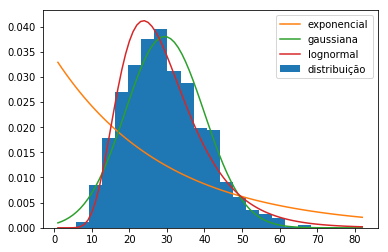

In [20]:
l_exp = vo2.size / np.sum(vo2)

#media e variância da distribuição normal
media = np.mean(vo2)
var = np.var(vo2)

#media e variância da distribuição lognormal 
media_log = np.mean(list(map(log,vo2)))
var_log = np.var(list(map(log,vo2)))
std_log = np.std(list(map(log,vo2)))
#lambda da distribuição weibull

exp = lambda x: l_exp * (e**(-l_exp * x))
gaussian = lambda x : 1/(var * sqrt(2 * pi)) * e**( - ((x - media)**2) / (2 * var**2) )
lognormal= lambda x : (e**(-(log(x) - media_log)**2 / (2 * var_log**2))/ (x * var_log * sqrt(2 * pi)))

#domínio do gráfico para as distribuições parametrizadas
x = [x for x in range(1,int(round(np.amax(vo2)))+10)]
sigma = np.std(vo2)
b = 3.49*sigma*pow(vo2.size,-1./3)
bins_list = [y for y in np.arange(np.amin(vo2),np.amax(vo2)+b,b)]

exp_vo2 = list(map(exp,x))
gaussian_vo2 = list(map(norm(loc=media,scale=np.std(vo2)).pdf,x))
lognormal_vo2 = list(map(lognorm(s=std_log,scale=e**(media_log)).pdf,x))

vo2_exp_ks = kstest(vo2,expon(scale=1. / (l_exp)).cdf)[0]
vo2_norm_ks = kstest(vo2,norm(loc=media,scale=np.std(vo2)).cdf)[0]
vo2_lognorm_ks = kstest(vo2,lognorm(s=std_log,scale=e**(media_log)).cdf)[0]


plt.hist(vo2,bins = bins_list, label='distribuição', density=True)
plt.plot(x,exp_vo2,label='exponencial')
plt.plot(x,gaussian_vo2,label='gaussiana')
plt.plot(x,lognormal_vo2,label='lognormal')
plt.legend(loc='best')
#plt.savefig('mle-vo2.png')

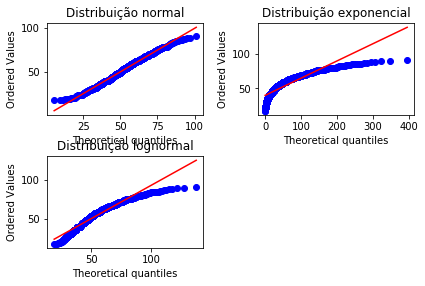

In [21]:
#idade Probability plots

ax1 = plt.subplot(221)
probplot(idade,dist=norm(loc=np.mean(idade),scale=np.std(idade)),plot=plt)


ax2 = plt.subplot(222)
probplot(idade,dist=expon(scale=1. / (idade.size/np.sum(idade))),plot=plt)

ax3 = plt.subplot(223)
media_log = np.mean(list(map(log,idade)))
std_log = np.std(list(map(log,idade)))
probplot(idade,dist=lognorm(s=std_log,scale=e**(media_log)),plot=plt)


ax1.title.set_text('Distribuição normal')
ax2.title.set_text('Distribuição exponencial')
ax3.title.set_text('Distribuição lognormal')

plt.subplots_adjust(top=0.9, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)
#plt.savefig('idade-probabilityplot.png')

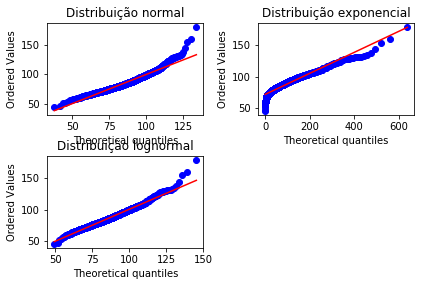

In [22]:
#peso Probability plots

ax1 = plt.subplot(221)
probplot(peso,dist=norm(loc=np.mean(peso),scale=np.std(peso)),plot=plt)


ax2 = plt.subplot(222)
probplot(peso,dist=expon(scale=1. / (peso.size/np.sum(peso))),plot=plt)

ax3 = plt.subplot(223)
media_log = np.mean(list(map(log,peso)))
std_log = np.std(list(map(log,peso)))
probplot(peso,dist=lognorm(s=std_log,scale=e**(media_log)),plot=plt)


ax1.title.set_text('Distribuição normal')
ax2.title.set_text('Distribuição exponencial')
ax3.title.set_text('Distribuição lognormal')

plt.subplots_adjust(top=0.9, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)
#plt.savefig('peso-probabilityplot.png')

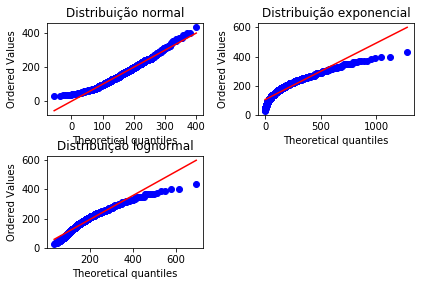

In [23]:
#carga Probability plots

ax1 = plt.subplot(221)
probplot(carga,dist=norm(loc=np.mean(carga),scale=np.std(carga)),plot=plt)


ax2 = plt.subplot(222)
probplot(carga,dist=expon(scale=1. / (carga.size/np.sum(carga))),plot=plt)

ax3 = plt.subplot(223)
media_log = np.mean(list(map(log,carga)))
std_log = np.std(list(map(log,carga)))
probplot(carga,dist=lognorm(s=std_log,scale=e**(media_log)),plot=plt)


ax1.title.set_text('Distribuição normal')
ax2.title.set_text('Distribuição exponencial')
ax3.title.set_text('Distribuição lognormal')

plt.subplots_adjust(top=0.9, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)
#plt.savefig('carga-probabilityplot.png')

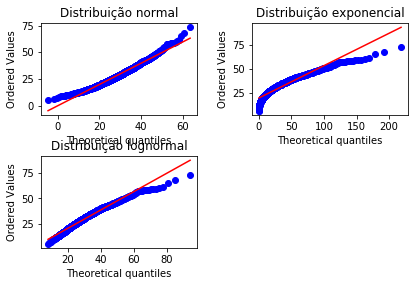

In [24]:
#vo2 Probability plots

ax1 = plt.subplot(221)
probplot(vo2,dist=norm(loc=np.mean(vo2),scale=np.std(vo2)),plot=plt)


ax2 = plt.subplot(222)
probplot(vo2,dist=expon(scale=1. / (vo2.size/np.sum(vo2))),plot=plt)

ax3 = plt.subplot(223)
media_log = np.mean(list(map(log,vo2)))
std_log = np.std(list(map(log,vo2)))
probplot(vo2,dist=lognorm(s=std_log,scale=e**(media_log)),plot=plt)


ax1.title.set_text('Distribuição normal')
ax2.title.set_text('Distribuição exponencial')
ax3.title.set_text('Distribuição lognormal')

plt.subplots_adjust(top=0.9, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)
#plt.savefig('vo2-probabilityplot.png')

In [25]:
print('idade')
print('Distribuição exponencial:',idade_exp_ks)
print('Distribuição gaussiana:',idade_norm_ks)
print('Distribuição lognormal:',idade_lognorm_ks)

print('\npeso')
print('Distribuição exponencial:',peso_exp_ks)
print('Distribuição gaussiana:',peso_norm_ks)
print('Distribuição lognormal:',peso_lognorm_ks)

print('\ncarga')
print('Distribuição exponencial:',carga_exp_ks)
print('Distribuição gaussiana:',carga_norm_ks)
print('Distribuição lognormal:',carga_lognorm_ks)

print('\nvo2')
print('Distribuição exponencial:',vo2_exp_ks)
print('Distribuição gaussiana:',vo2_norm_ks)
print('Distribuição lognormal:',vo2_lognorm_ks)

idade
Distribuição exponencial: 0.372755615059967
Distribuição gaussiana: 0.04408368872194113
Distribuição lognormal: 0.08473046044762722

peso
Distribuição exponencial: 0.4954410013455397
Distribuição gaussiana: 0.06661818817785059
Distribuição lognormal: 0.03228525900266199

carga
Distribuição exponencial: 0.28651634266099946
Distribuição gaussiana: 0.039233911356943985
Distribuição lognormal: 0.08035970386976432

vo2
Distribuição exponencial: 0.3348896789424037
Distribuição gaussiana: 0.044531849851028094
Distribuição lognormal: 0.04056142112151179


Coeficiente de correlação idade e vo2: -0.6300720192503417
Coeficiente de correlação peso e vo2: -0.17440061829630799
Coeficiente de correlação carga e vo2: 0.878325609405962


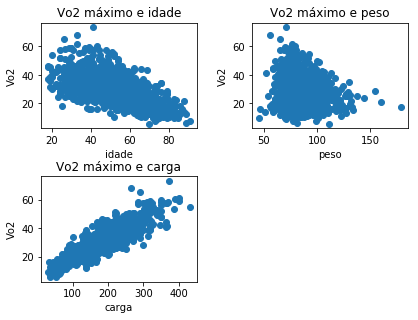

In [32]:
idade_vo2_coef = np.corrcoef(idade,vo2)[0][1]
peso_vo2_coef = np.corrcoef(peso,vo2)[0][1]
carga_vo2_coef = np.corrcoef(carga,vo2)[0][1]
print('Coeficiente de correlação idade e vo2:',idade_vo2_coef)
print('Coeficiente de correlação peso e vo2:',peso_vo2_coef)
print('Coeficiente de correlação carga e vo2:',carga_vo2_coef)

plt.subplot(221)
plt.title('Vo2 máximo e idade')
plt.ylabel('Vo2')
plt.xlabel('idade')
plt.scatter(idade,vo2)
#plt.savefig('scatter-idade-vo2.png')

plt.subplot(222)
plt.title('Vo2 máximo e peso')
plt.ylabel('Vo2')
plt.xlabel('peso')
plt.scatter(peso,vo2)
#plt.savefig('scatter-peso-vo2.png')

plt.subplot(223)
plt.title('Vo2 máximo e carga')
plt.ylabel('Vo2')
plt.xlabel('carga')
plt.scatter(carga,vo2)
#plt.savefig('scatter-carga-vo2.png')

plt.subplots_adjust(top=0.9, bottom=0, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

In [27]:
a_idade,b_idade,_,_,_=linregress(idade,vo2)
a_carga,b_carga,_,_,_=linregress(carga,vo2)

print('Idade-> a={} e b={}'.format(a_idade,b_idade))
print('Carga-> a={} e b={}'.format(a_carga,b_carga))

Idade-> a=-0.4485209711821946 e b=53.296839098175624
Carga-> a=0.1315393426340689 e b=6.734247834098287
